In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("bbc-text.csv")

In [3]:
data.shape

(2225, 2)

In [4]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
data.isnull().any()

category    False
text        False
dtype: bool

In [6]:
data["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [7]:
data.groupby("category").count()

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


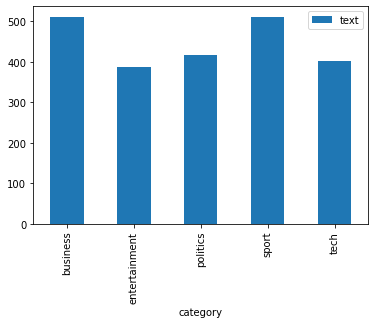

In [8]:
data.groupby("category").count().plot.bar()

In [9]:
le=LabelEncoder()

In [10]:
data["category_id"]=le.fit_transform(data["category"])

In [11]:
data.head()

,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


In [12]:
category_id_df = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,category,category_id
1,business,0
4,entertainment,1
5,politics,2
2,sport,3
0,tech,4


In [13]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(encoding='latin-1', ngram_range=(1, 2), stop_words='english',min_df=5)
features = tfidf.fit_transform(data.text).toarray()  
labels = data.category_id    

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.35, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)


In [43]:
model.fit(features,labels)

LogisticRegression(random_state=0)

In [17]:
texts=["The private lender made lesser provisions for the quarter compared with June quarter and beat Street estimates on the bottom line front. A pre-provision profit growth of 18 per cent was healthy; so were growth in deposits and advances."]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"The private lender made lesser provisions for the quarter compared with June quarter and beat Street estimates on the bottom line front. A pre-provision profit growth of 18 per cent was healthy; so were growth in deposits and advances."
  - Predicted as: 'business'



In [47]:
model.score(X_test,y_test)

0.9781771501925546

Text(0.5, 15.0, 'Predicted')

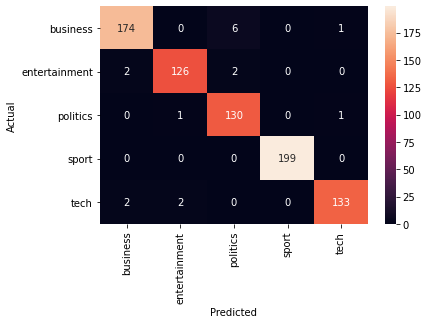

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values,yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')